# Least Squares Approximation with Trygonometric Polynomial

In [1]:
from math import cos, pi
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12,8]

### Even distribution of n values between a and b (inclusive)

In [2]:
def even(n, a, b):
    n -= 1
    d = (b - a) / n
    result = [0] * (n + 1)
    result[0] = a
    result[n] = b
    for i in range(1, n):
        result[i] = result[i - 1] + d
    return result

### Function generator

In [3]:
# with m as polynomial's order and w as weight function for each point

def lsquares(X, Y, m, a = None, b = None, w=None):
    if a is None: a = X[0]
    if b is None: b = X[-1]
        
    def to2pi(x):
        return (2*pi*x - 2*pi*a)/(b-a)

    X = to2pi(X)

    n = len(X)
    if w is None:
        w = np.array([1] * n)
    matrix = np.zeros((m * 2 + 1, m * 2 + 1))
    r_vector = np.empty(2 * m + 1)

    matrix[0, 0] = w.sum()
    for i in range(m):
        matrix[0, 2 * i + 1] = (w * np.sin((i + 1) * X)).sum()
        matrix[0, 2 * i + 2] = (w * np.cos((i + 1) * X)).sum()
    r_vector[0] = (Y * w).sum()
    for i in range(m):
        matrix[2 * i + 1, 0] = (w * np.sin((i + 1) * X)).sum()
        matrix[2 * i + 2, 0] = (w * np.cos((i + 1) * X)).sum()
        for j in range(m):
            matrix[2 * i + 1, 2 * j + 1] = (w * np.sin((i + 1) * X) * np.sin((j + 1) * X)).sum()
            matrix[2 * i + 1, 2 * j + 2] = (w * np.sin((i + 1) * X) * np.cos((j + 1) * X)).sum()

            matrix[2 * i + 2, 2 * j + 1] = (w * np.cos((i + 1) * X) * np.sin((j + 1) * X)).sum()
            matrix[2 * i + 2, 2 * j + 2] = (w * np.cos((i + 1) * X) * np.cos((j + 1) * X)).sum()
        r_vector[2 * i + 1] = (w * np.sin((i + 1) * X) * Y).sum()
        r_vector[2 * i + 2] = (w * np.cos((i + 1) * X) * Y).sum()
    print(matrix.shape)
    print(r_vector.shape)

    c = np.linalg.solve(matrix, r_vector)
    

    def f(x):
        x = to2pi(x)
        result = np.array([None] * (2 * m + 1))
        result[0] = 1
        for i in range(m):
            result[2 * i + 1] = (np.sin((i + 1) * x))
            result[2 * i + 2] = (np.cos((i + 1) * x))
        result *= c
        return np.sum(result)

    return f


### Mapping an array of values x to an array of f(x)

In [4]:
def function_to_points(X, f): return [f(X[i]) for i in range(len(X))]

### Finding the largest difference

In [5]:
def f_compare_max(Y1,Y2):
    diff = np.abs(Y1 - Y2)
    return np.max(diff)

### Summation of sqared difference of function value for each x in the scope


In [6]:
def f_compare_sqr(Y1,Y2):
    diff = np.square(Y1 - Y2)
    return np.sum(diff)

### Plot generation

In [7]:
def plot(X,Y,f1,f2,a,b):
    X2 = np.linspace(a,b,2000)
    Y1 = f1(X2)
    Y2 = f2(X2)
    plt.plot(X2,Y1,'g')
    plt.plot(X2, Y2, 'b')
    plt.scatter(X,Y,c='r',s=15,marker = 'o')
    plt.show()

### The problem is to interpolate given function:

In [8]:
a,b = -2*pi,pi
def f(x): return np.exp(-3*np.sin(3*x))
dx_at_a = -9
X = np.linspace(a,b,2000)
Y = f(X)

# 32 nodes and 10 degree polinomial

In [9]:
n,m=32,10

In [10]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(21, 21)
(21,)


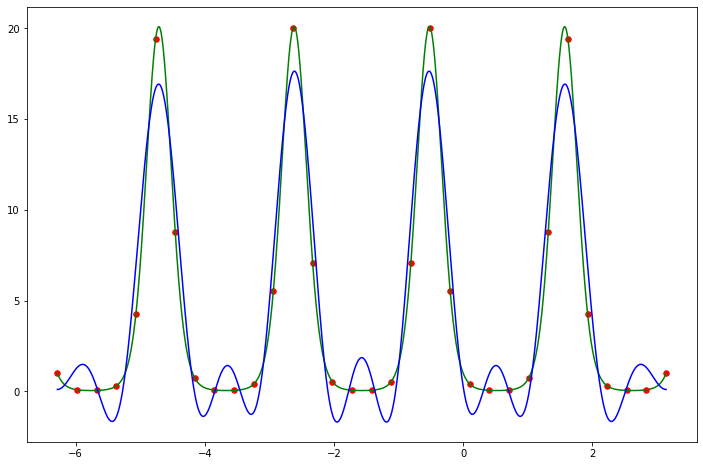

In [11]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [12]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  3.16
sum of squared differences:  4296.97


In [13]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  3.16
suma kwadratów różnic:  4296.97


# 32 nodes and 20 degree polinomial

In [14]:
n,m=32,20

In [15]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(41, 41)
(41,)


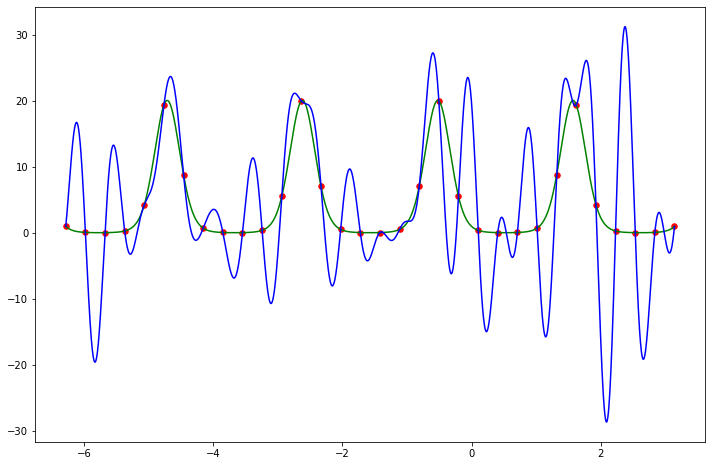

In [16]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [17]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  31.16
sum of squared differences:  178920.21


In [18]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  31.16
suma kwadratów różnic:  178920.21


# 32 nodes and 30 degree polinomial

In [19]:
n,m=32,30

In [20]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(61, 61)
(61,)


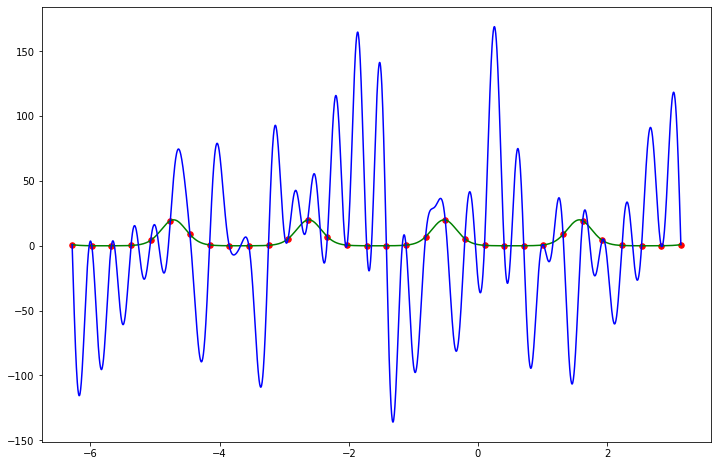

In [21]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [22]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  168.94
sum of squared differences:  6763715.67


In [23]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  168.94
suma kwadratów różnic:  6763715.67


# 64 nodes and 10 degree polinomial

In [24]:
n,m=64,10

In [25]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(21, 21)
(21,)


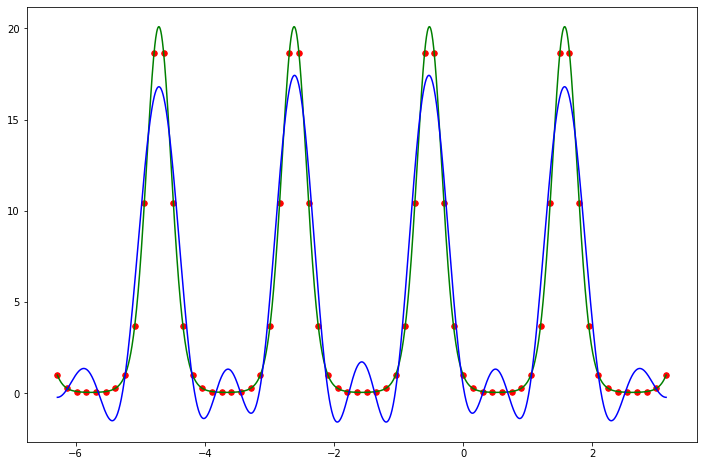

In [26]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [27]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  3.29
sum of squared differences:  4223.12


In [28]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  3.29
suma kwadratów różnic:  4223.12


# 64 nodes and 20 degree polinomial

In [29]:
n,m=64,20

In [30]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(41, 41)
(41,)


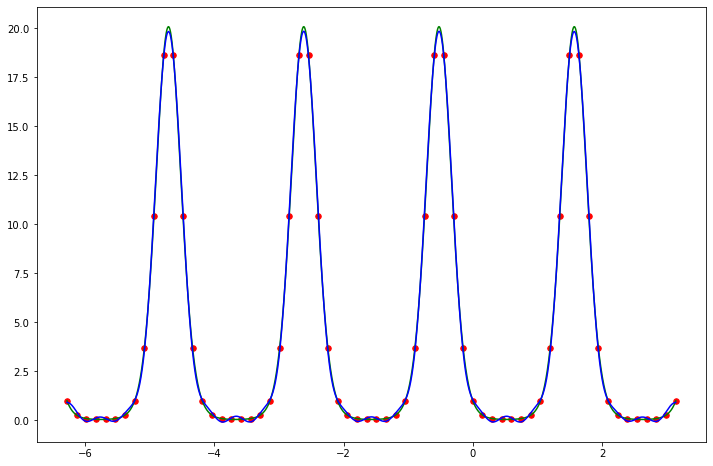

In [31]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [32]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  0.27
sum of squared differences:  36.44


In [33]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  0.27
suma kwadratów różnic:  36.44


# 64 nodes and 30 degree polinomial

In [34]:
n,m=64,30

In [35]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(61, 61)
(61,)


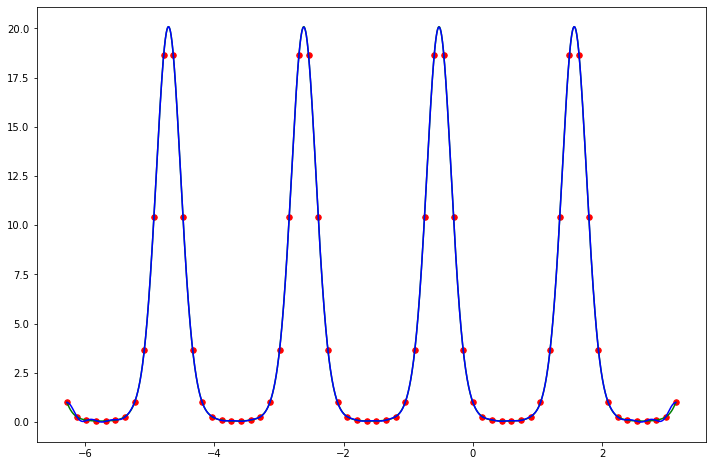

In [36]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [37]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  0.25
sum of squared differences:  2.99


In [38]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  0.25
suma kwadratów różnic:  2.99


# 128 nodes and 10 degree polinomial

In [39]:
n,m=128,10

In [40]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(21, 21)
(21,)


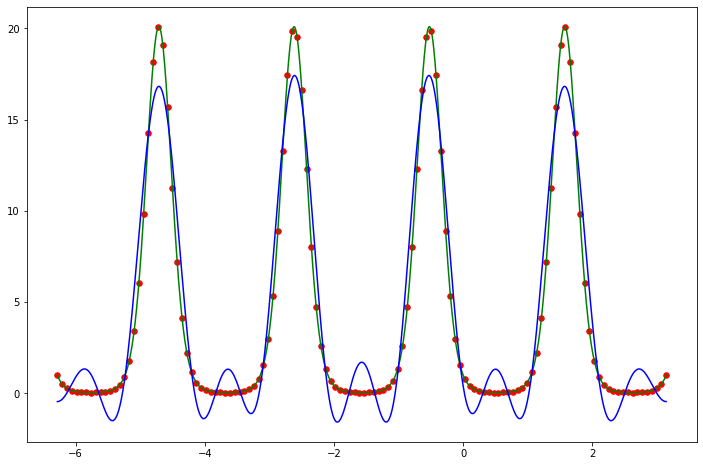

In [41]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [42]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  3.27
sum of squared differences:  4207.99


In [43]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  3.27
suma kwadratów różnic:  4207.99


# 128 nodes and 20 degree polinomial

In [44]:
n,m=128,20

In [45]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(41, 41)
(41,)


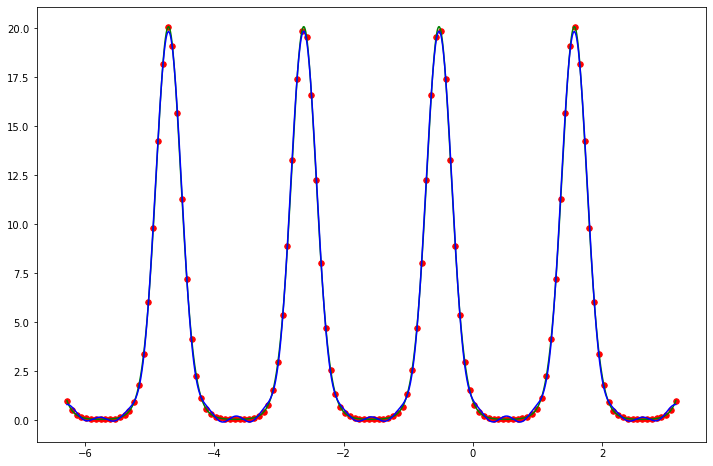

In [46]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [47]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  0.25
sum of squared differences:  34.87


In [48]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  0.25
suma kwadratów różnic:  34.87


# 128 nodes and 30 degree polinomial

In [49]:
n,m=128,30

In [50]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

(61, 61)
(61,)


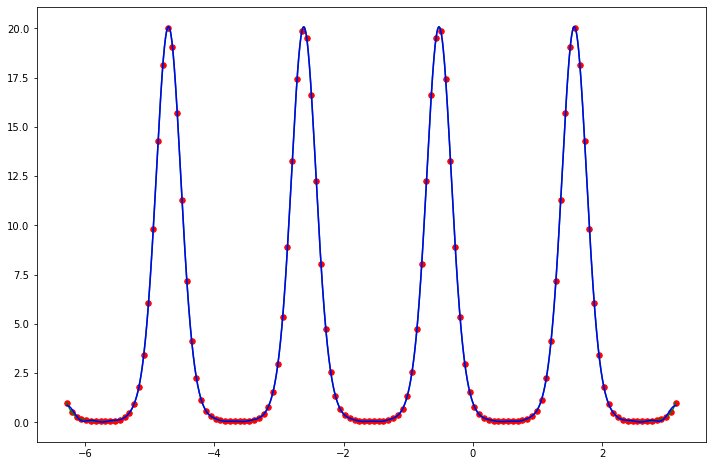

In [51]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [52]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  0.16
sum of squared differences:  1.32


In [53]:
print("największa różnica   : ",round(s_max,2))
print("suma kwadratów różnic: ",round(s_sqr,2))

największa różnica   :  0.16
suma kwadratów różnic:  1.32
